In [ ]:
import pandas as pd

# Load the dataset
data = pd.read_csv('HepatitisCdata.csv')

# Check for missing values
missing_values = data.isnull().sum()
print(missing_values)


Unnamed: 0     0
Category       0
Age            0
Sex            0
ALB            1
ALP           18
ALT            1
AST            0
BIL            0
CHE            0
CHOL          10
CREA           0
GGT            0
PROT           1
dtype: int64


In [ ]:
data.fillna(data.mean())

<ipython-input-50-f4696802a847>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.fillna(data.mean())


,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,1,0=Blood Donor,32,m,38.5,52.50000,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,2,0=Blood Donor,32,m,38.5,70.30000,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,3,0=Blood Donor,32,m,46.9,74.70000,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,4,0=Blood Donor,32,m,43.2,52.00000,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,5,0=Blood Donor,32,m,39.2,74.10000,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
610,611,3=Cirrhosis,62,f,32.0,416.60000,5.9,110.3,50.0,5.57,6.30,55.7,650.9,68.5
611,612,3=Cirrhosis,64,f,24.0,102.80000,2.9,44.4,20.0,1.54,3.02,63.0,35.9,71.3
612,613,3=Cirrhosis,64,f,29.0,87.30000,3.5,99.0,48.0,1.66,3.63,66.7,64.2,82.0
613,614,3=Cirrhosis,46,f,33.0,68.28392,39.0,62.0,20.0,3.56,4.20,52.0,50.0,71.0


In [ ]:
diagnosis_counts = data['Category'].value_counts()
print(diagnosis_counts)

0=Blood Donor             533
3=Cirrhosis                30
1=Hepatitis                24
2=Fibrosis                 21
0s=suspect Blood Donor      7
Name: Category, dtype: int64


In [ ]:
# Perform one-hot encoding on 'sex'
encoded_data = pd.get_dummies(data, columns=['Sex'])


       Unnamed: 0         Age         ALB         ALP         ALT         AST  \
count  615.000000  615.000000  614.000000  597.000000  614.000000  615.000000   
mean   308.000000   47.408130   41.620195   68.283920   28.450814   34.786341   
std    177.679487   10.055105    5.780629   26.028315   25.469689   33.090690   
min      1.000000   19.000000   14.900000   11.300000    0.900000   10.600000   
25%    154.500000   39.000000   38.800000   52.500000   16.400000   21.600000   
50%    308.000000   47.000000   41.950000   66.200000   23.000000   25.900000   
75%    461.500000   54.000000   45.200000   80.100000   33.075000   32.900000   
max    615.000000   77.000000   82.200000  416.600000  325.300000  324.000000   

              BIL         CHE        CHOL         CREA         GGT        PROT  
count  615.000000  615.000000  605.000000   615.000000  615.000000  614.000000  
mean    11.396748    8.196634    5.368099    81.287805   39.533171   72.044137  
std     19.673150    2.2056

<Axes: >

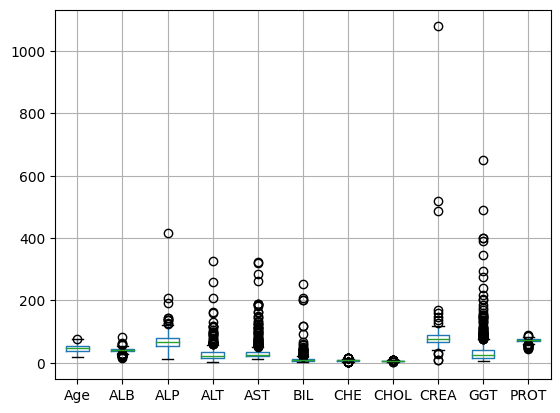

In [ ]:
# Descriptive statistics
feature_stats = data.describe()
print(feature_stats)

# Box plots to visualize feature distributions
data.boxplot(column=['Age', 'ALB', 'ALP', 'ALT', 'AST', 'BIL', 'CHE', 'CHOL', 'CREA', 'GGT', 'PROT'])


In [ ]:
class_frequencies = data['Category'].value_counts(normalize=True)
print(class_frequencies)

0=Blood Donor             0.866667
3=Cirrhosis               0.048780
1=Hepatitis               0.039024
2=Fibrosis                0.034146
0s=suspect Blood Donor    0.011382
Name: Category, dtype: float64


In [ ]:
##

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV

In [ ]:
# Step 1: Data Preprocessing
data = pd.read_csv('HepatitisCdata.csv')

# Handle missing values (assuming dropping rows with missing values)
data.dropna(inplace=True)

In [ ]:
# Step 2: Feature Engineering
# Example: One-Hot Encoding for categorical variable 'sex'
data_encoded = pd.get_dummies(data, columns=['Sex'])

# Example: Scaling numerical features using StandardScaler
scaler = StandardScaler()
data_encoded[['Age', 'ALB', 'ALP', 'ALT', 'AST', 'BIL', 'CHE', 'CHOL', 'CREA', 'GGT', 'PROT']] = scaler.fit_transform(
    data_encoded[['Age', 'ALB', 'ALP', 'ALT', 'AST', 'BIL', 'CHE', 'CHOL', 'CREA', 'GGT', 'PROT']])

In [ ]:
# Step 3: Split dataset into train-test
X = data_encoded.drop(['Category'], axis=1)  # Features
y = data_encoded['Category']  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Step 4: Model selection (example: Random Forest Classifier)
model = RandomForestClassifier()

In [ ]:
# Step 5: Model training
model.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
# Step 6: Model evaluation
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

In [ ]:
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")


Accuracy: 0.9576271186440678
Precision: 0.8494285714285713
Recall: 0.75
F1 Score: 0.774146490025887


In [ ]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

In [ ]:
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_

In [ ]:
# Step 8: Make predictions
new_data_encoded = X.copy()  # Create a copy of the original data for predictions

# Scale the numerical features using the pre-trained scaler
new_data_encoded[['Age', 'ALB', 'ALP', 'ALT', 'AST', 'BIL', 'CHE', 'CHOL', 'CREA', 'GGT', 'PROT']] = scaler.transform(
    new_data_encoded[['Age', 'ALB', 'ALP', 'ALT', 'AST', 'BIL', 'CHE', 'CHOL', 'CREA', 'GGT', 'PROT']])

# Make predictions using the best model
new_predictions = best_model.predict(new_data_encoded)

In [ ]:
# Step 9: Model Performance Summary
best_accuracy = accuracy_score(y_test, best_model.predict(X_test))
best_precision = precision_score(y_test, best_model.predict(X_test), average='macro')
best_recall = recall_score(y_test, best_model.predict(X_test), average='macro')
best_f1 = f1_score(y_test, best_model.predict(X_test), average='macro')

print("Best Model Performance:")
print(f"Accuracy: {best_accuracy}")
print(f"Precision: {best_precision}")
print(f"Recall: {best_recall}")
print(f"F1 Score: {best_f1}")

Best Model Performance:
Accuracy: 0.9745762711864406
Precision: 0.8914285714285715
Recall: 0.85
F1 Score: 0.8433333333333334
